<a href="https://colab.research.google.com/github/224986/ASE_Ciencia_de_Datos/blob/master/Act_18_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

In [ ]:
from google.colab import files
import io
upload=files.upload()

Saving cust_seg.csv to cust_seg.csv


In [ ]:
df = pd.read_csv("cust_seg.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [ ]:
df["Edu"].unique()

array([2, 1, 3, 4, 5])

In [ ]:
df.groupby("Edu").get_group(3).describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,87.000000,101.000000
mean,384.019802,385.019802,36.039604,3.0,7.960396,63.019802,2.106733,4.553109,0.344828,10.641584
std,260.888328,260.888328,8.305325,0.0,6.343376,45.509995,2.527996,4.861260,0.478067,6.948558
min,7.000000,8.000000,20.000000,3.0,0.000000,15.000000,0.022000,0.053000,0.000000,0.100000
25%,161.000000,162.000000,29.000000,3.0,3.000000,30.000000,0.459000,1.391000,0.000000,5.400000
50%,364.000000,365.000000,37.000000,3.0,7.000000,50.000000,1.383000,3.083000,0.000000,9.400000
75%,604.000000,605.000000,41.000000,3.0,13.000000,82.000000,2.561000,5.650000,1.000000,14.400000
max,841.000000,842.000000,54.000000,3.0,25.000000,266.000000,15.792000,27.034000,1.000000,36.600000


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)

In [ ]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
# Age distribution

print(cl(df['Age'].describe(), attrs = ['bold']))


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


<ipython-input-11-b9c13bb04f51>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age'],


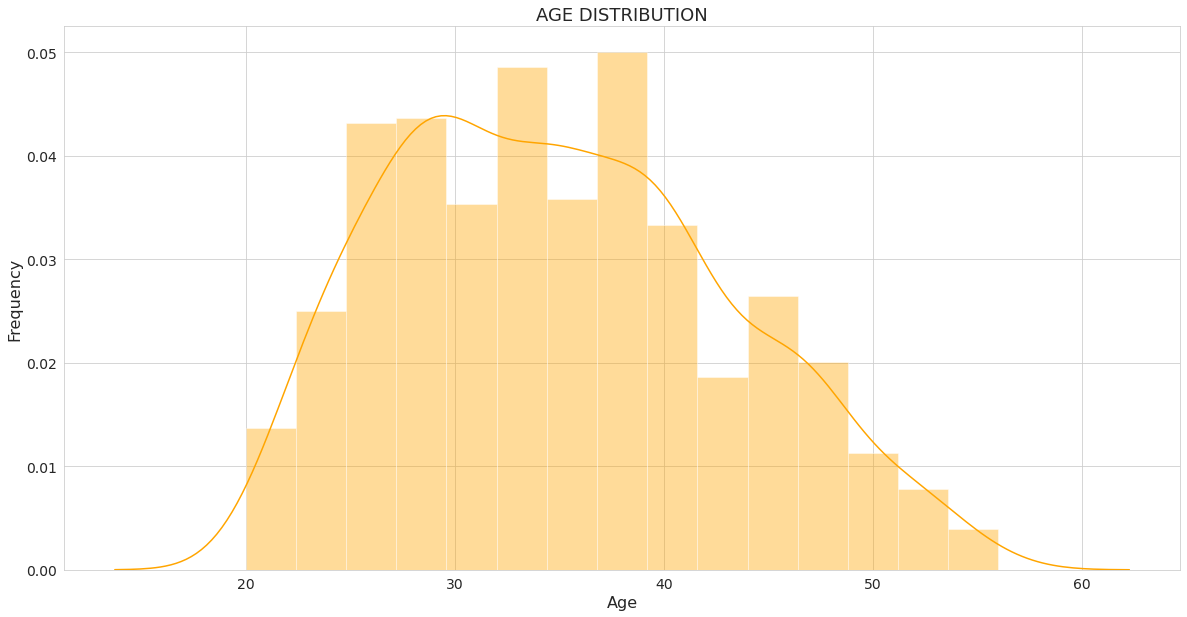

In [ ]:
sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

array([[<Axes: title={'center': 'Edu'}>]], dtype=object)

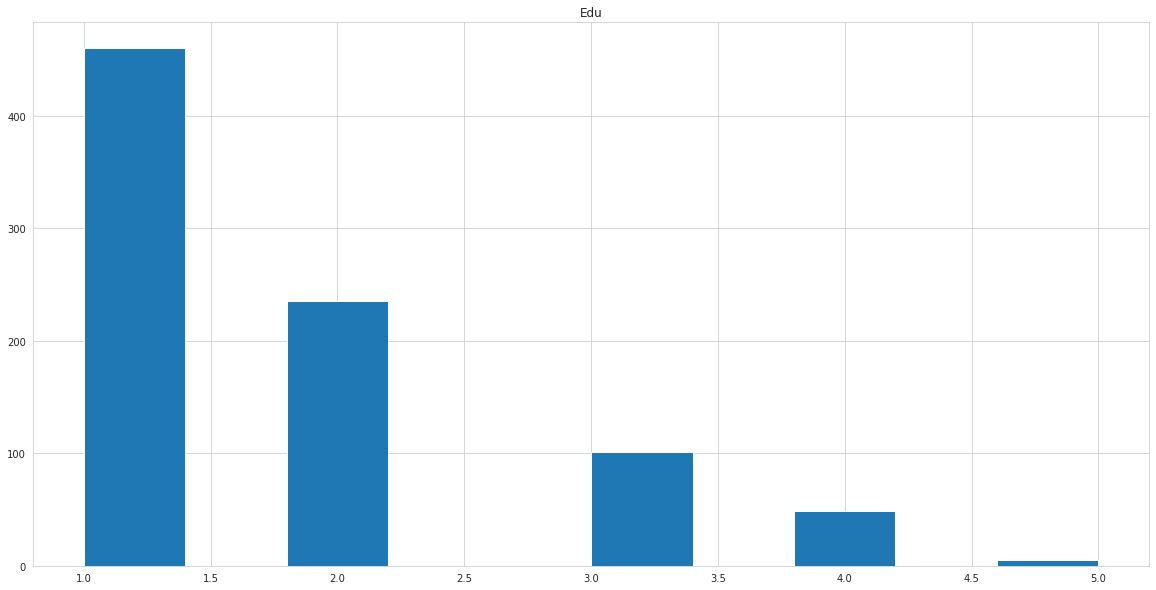

In [ ]:
df.hist("Edu")

In [ ]:
# Credit card default cases

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))


.......................................
Number of Default cases are 183
.......................................
Number of Non-Default cases are 517
.......................................
Percentage of Default cases is 35%
.......................................


In [ ]:
df["Defaulted"].fillna(-1, inplace=True)

In [ ]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [ ]:
df.groupby("Defaulted").get_group(0).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,517.000000
mean,35.514507,1.659574,9.508704,47.154739,1.245513,2.773389,0.0,8.679304
std,7.707736,0.904430,6.663741,34.220150,1.422341,2.813925,0.0,5.615197
min,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.0,0.400000
25%,29.000000,1.000000,4.000000,25.000000,0.333000,0.993000,0.0,4.500000
50%,35.000000,1.000000,9.000000,36.000000,0.729000,1.880000,0.0,7.300000
75%,41.000000,2.000000,14.000000,57.000000,1.607000,3.435000,0.0,11.800000
max,56.000000,5.000000,31.000000,253.000000,9.877000,18.269000,0.0,32.500000


array([[<Axes: title={'center': 'Defaulted'}>]], dtype=object)

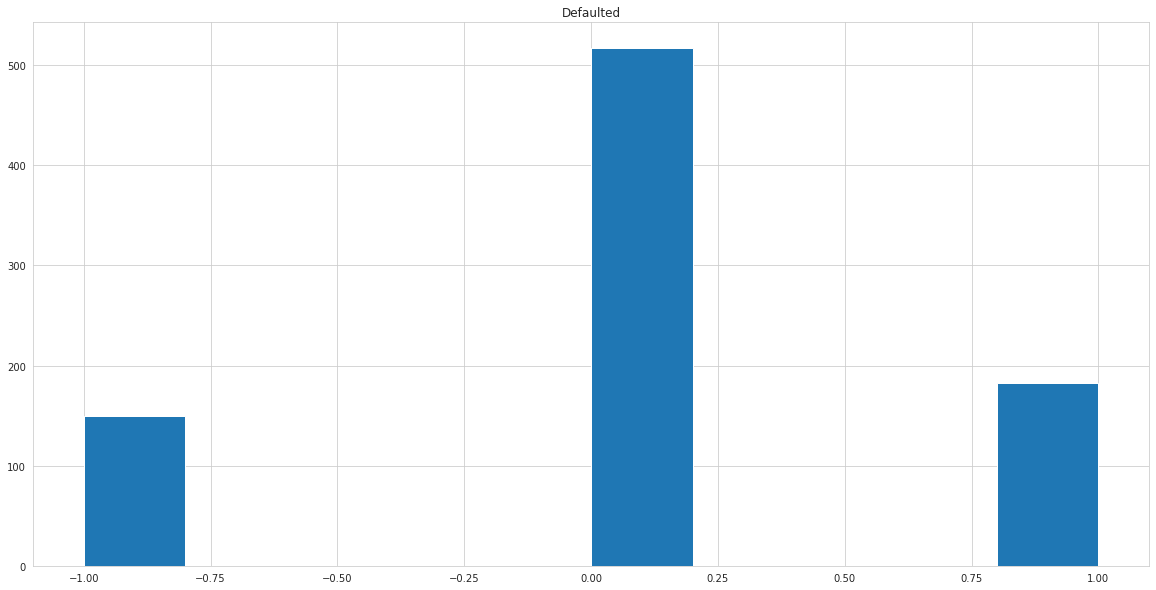

In [ ]:
df.hist("Defaulted")

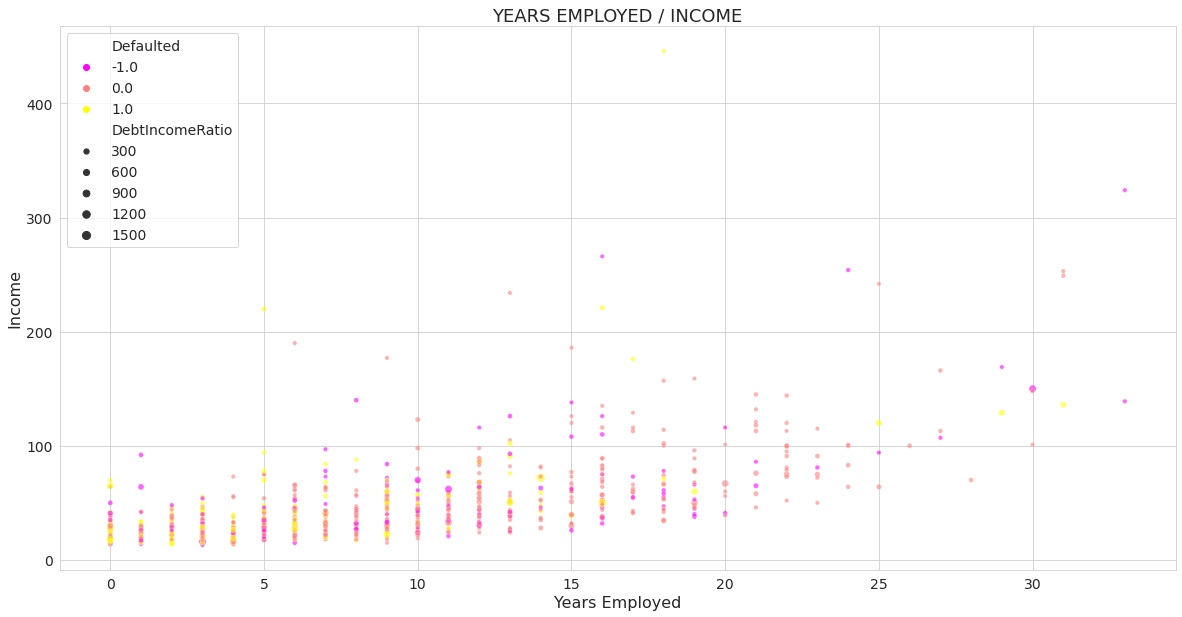

In [ ]:
# Years Employed vs Income
area = df.DebtIncomeRatio ** 2

sb.scatterplot(x='Years Employed', y='Income', 
               data=df, 
               size=area, 
               alpha=0.6, 
               edgecolor='white', 
               hue='Defaulted', 
               palette='spring')
plt.title('YEARS EMPLOYED / INCOME', fontsize=18)
plt.xlabel('Years Employed', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.savefig('y_income.png')
plt.show()








In [ ]:
# DATA PROCESSING

X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.06214689 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.06214689  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.5386064   1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.06214689 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.06214689 -0.44250653]]


In [ ]:
# MODELING

clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
df['cluster_num'] = labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,1
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [ ]:
df.groupby('cluster_num').describe()

Age                                                       Edu  \
             count       mean       std   min   25%   50%   75%   max  count   
cluster_num                                                                    
0            183.0  41.333333  6.711752  26.0  37.0  41.0  46.0  56.0  183.0   
1            649.0  32.964561  7.279282  20.0  27.0  32.0  38.0  55.0  649.0   
2             18.0  45.388889  4.815891  37.0  42.0  45.0  50.0  53.0   18.0   

                       ... Defaulted      DebtIncomeRatio             \
                 mean  ...       75%  max           count       mean   
cluster_num            ...                                             
0            1.956284  ...       0.0  1.0           183.0  10.724590   
1            1.614792  ...       0.0  1.0           649.0  10.094761   
2            2.666667  ...       0.0  1.0            18.0   7.322222   

                                                     
                  std  min    25%  50%    75%   max  
cluster_num                                          
0            7.361811  0.1  5.400  9.2  14.35  41.3  
1            6.567069  0.6  5.100  8.7  13.60  36.6  
2            4.321976  2.0  4.175  7.1   7.80  17.6  

[3 rows x 64 columns]

In [ ]:
df.groupby("cluster_num").get_group(1).describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_num
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.0
mean,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.069337,10.094761,1.0
std,7.279282,0.865756,5.040272,11.134237,1.061791,1.777183,0.633284,6.567069,0.0
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,-1.000000,0.600000,1.0
25%,27.000000,1.000000,2.000000,22.000000,0.312000,0.913000,0.000000,5.100000,1.0
50%,32.000000,1.000000,5.000000,29.000000,0.676000,1.583000,0.000000,8.700000,1.0
75%,38.000000,2.000000,10.000000,40.000000,1.402000,2.691000,0.000000,13.600000,1.0
max,55.000000,5.000000,23.000000,57.000000,7.320000,11.874000,1.000000,36.600000,1.0


In [ ]:
kmeans_kwargs={"init":"random", "n_init":10, "max_iter":300, "random_state":2023}
sse=[]
for k in range (1,20):
  kmeans=KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(cluster_data)
  sse.append(kmeans.inertia_)

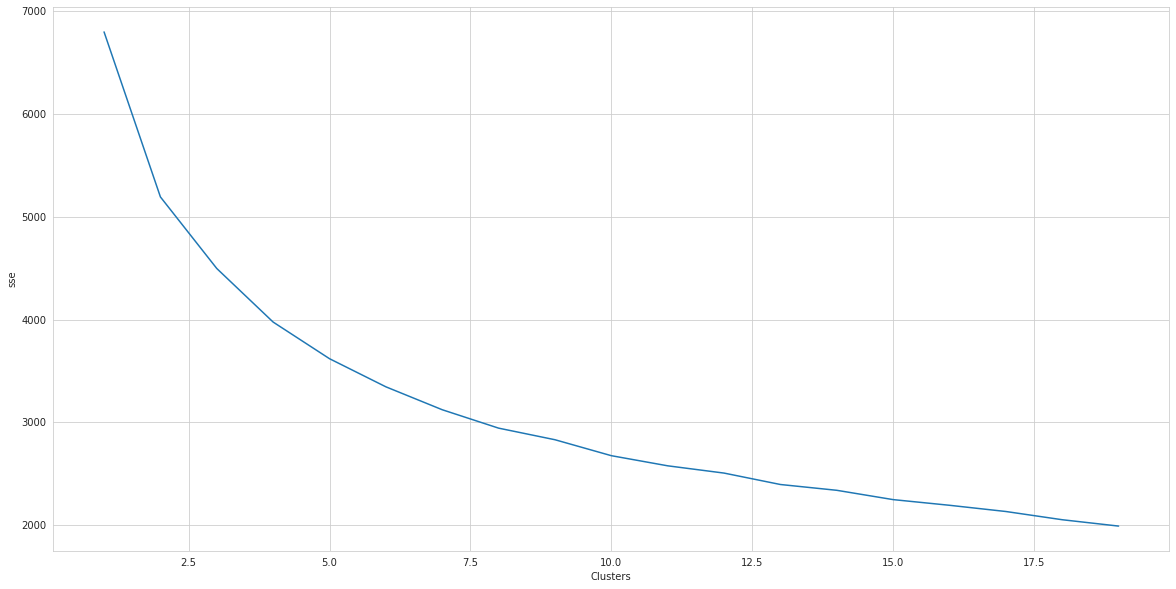

In [ ]:
plt.plot(range(1,20),sse)
plt.xlabel("Clusters")
plt.ylabel("sse")
plt.show()

In [ ]:
!pip install kneed 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,20), sse, curve="convex", direction="decreasing")
kl.elbow

6

In [ ]:

default = df[df['Defaulted'] == 1.0]
non_default = df[df['Defaulted'] == 0.0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Default cases are {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Number of Non-Default cases are {}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Percentage of Default cases is {:.0%}'.format(len(default)/len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

In [ ]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()

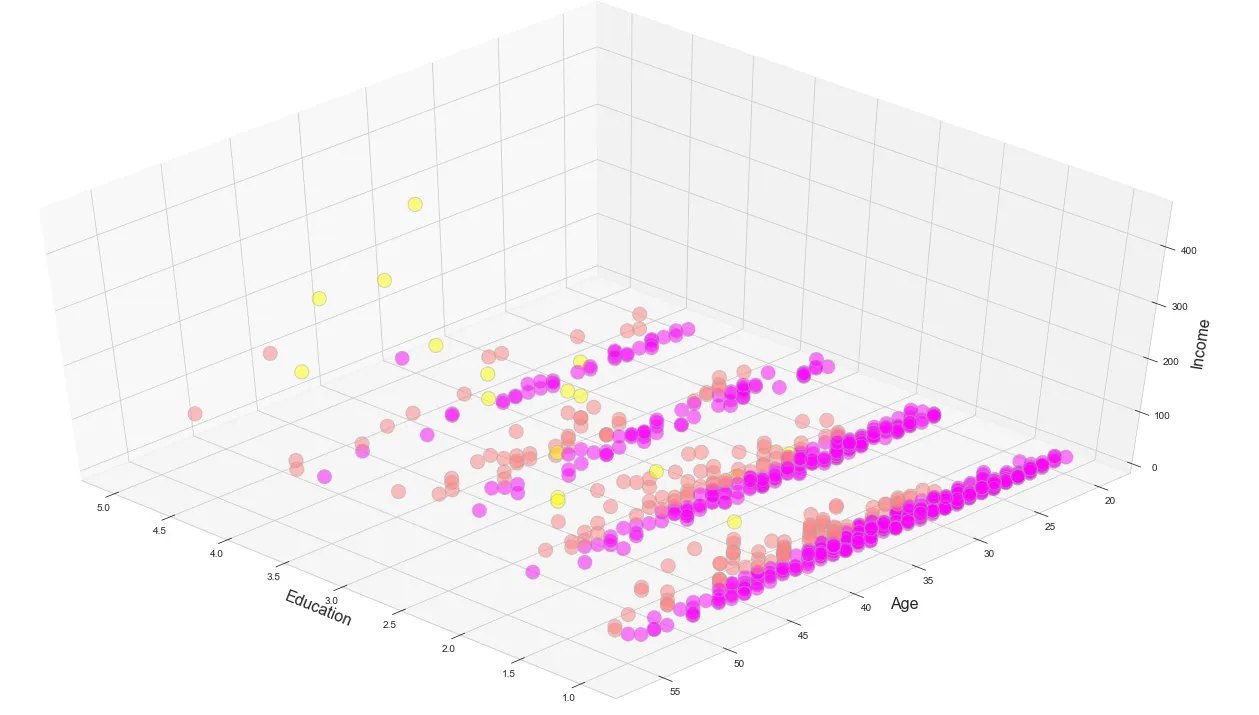